# Analysis notebook: `alpha_test`  

## Define analysis name

In [1]:
ana_label = "alpha_test"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/alpha_test

alpha_test.log	 analysis.csv  efficiency.csv  results.pkl
alpha_test.yaml  cut_flow.csv  hists.h5


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/alpha_test


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/alpha_test/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/alpha_test/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/alpha_test/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/alpha_test/analysis.csv
[Load] ⚠️ File not found: ../../../output/results/alpha_test/events.parquet
[Load] ⚠️ File not found: ../../../output/results/alpha_test/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"])

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,6932,100.000,100.000,No selection applied
1,has_trk_front,Preselect,6905,99.611,99.611,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,6336,91.402,91.760,Electron track fits
3,is_downstream,Preselect,3862,55.713,60.953,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,2491,35.935,64.500,One reco electron / event
5,is_truth_electron,Preselect,1002,14.455,40.225,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,448,6.463,44.711,Track fit quality > 0.8
7,has_hits,Tracker,446,6.434,99.554,>20 active tracker hits
8,within_d0,Tracker,60,0.866,13.453,Distance of closest approach (d_0 < 100 mm)
9,within_pitch_angle_lo,Tracker,51,0.736,85.000,Extrapolated pitch angle (pz/pt > 0.557735


### Efficiency & rates

In [7]:
display(results["analysis"])

,Type,CE-like (wide),CE-like (ext),CE-like (sig),No veto (wide),No veto (ext),No veto (sig)
0,k,23,0,0,0,0,0
1,N,50305998,50305998,50305998,23,0,0
2,Eff [%],0.000046,0.0,0.0,100.0,0.0,0.0
3,Eff Err$-$ [%],-0.000009,0.0,0.0,-4.166667,0.0,0.0
4,Eff Err$+$ [%],0.000011,0.000002,0.000002,0.0,100.0,100.0
5,Rate 1B [$\text{day}^{-1}$],103.485691,0.0,0.0,0.0,0.0,0.0
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-21.317794,0.0,0.0,0.0,0.0,0.0
7,Rate 1B Err$+$ [$\text{day}^{-1}$],26.251767,5.126745,5.126745,5.126745,5.126745,5.126745
8,Rate 2B [$\text{day}^{-1}$],115.085856,0.0,0.0,0.0,0.0,0.0
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-23.7074,0.0,0.0,0.0,0.0,0.0


### Histograms

In [8]:
# Setup draw for this cutset
draw = Draw(cutset_name=ana_label.split('_')[0])
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/alpha_test/h1o_1x3_mom_windows.png


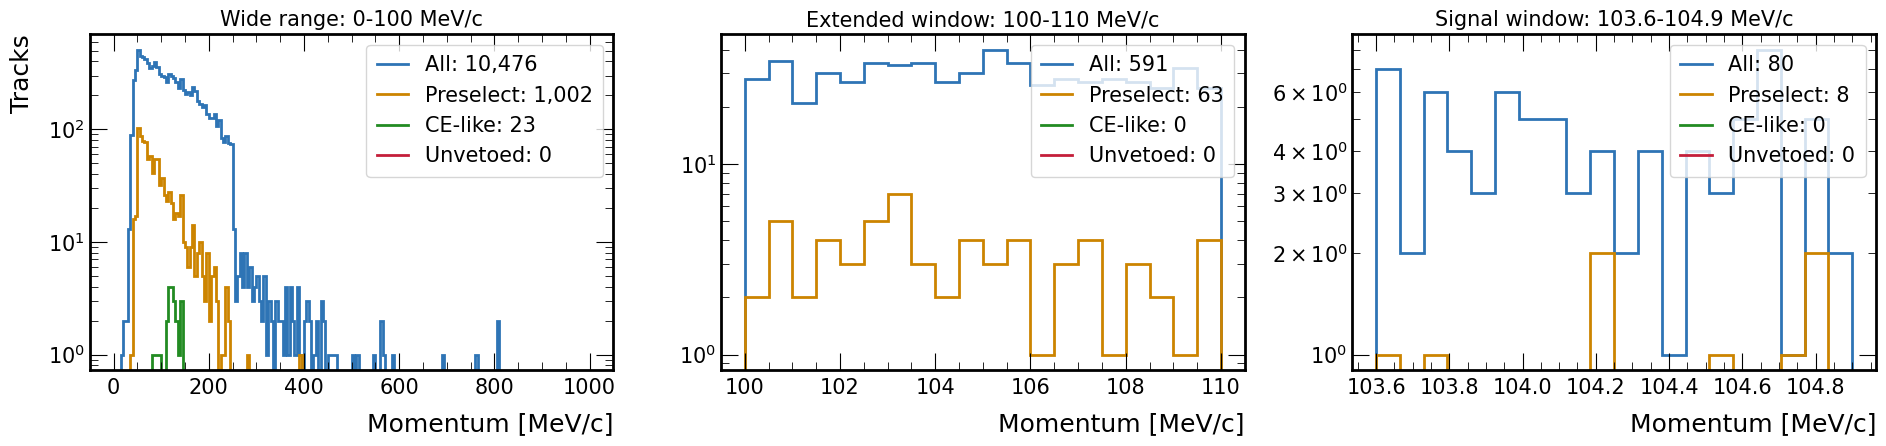

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/alpha_test/h1o_3x3_summary.png


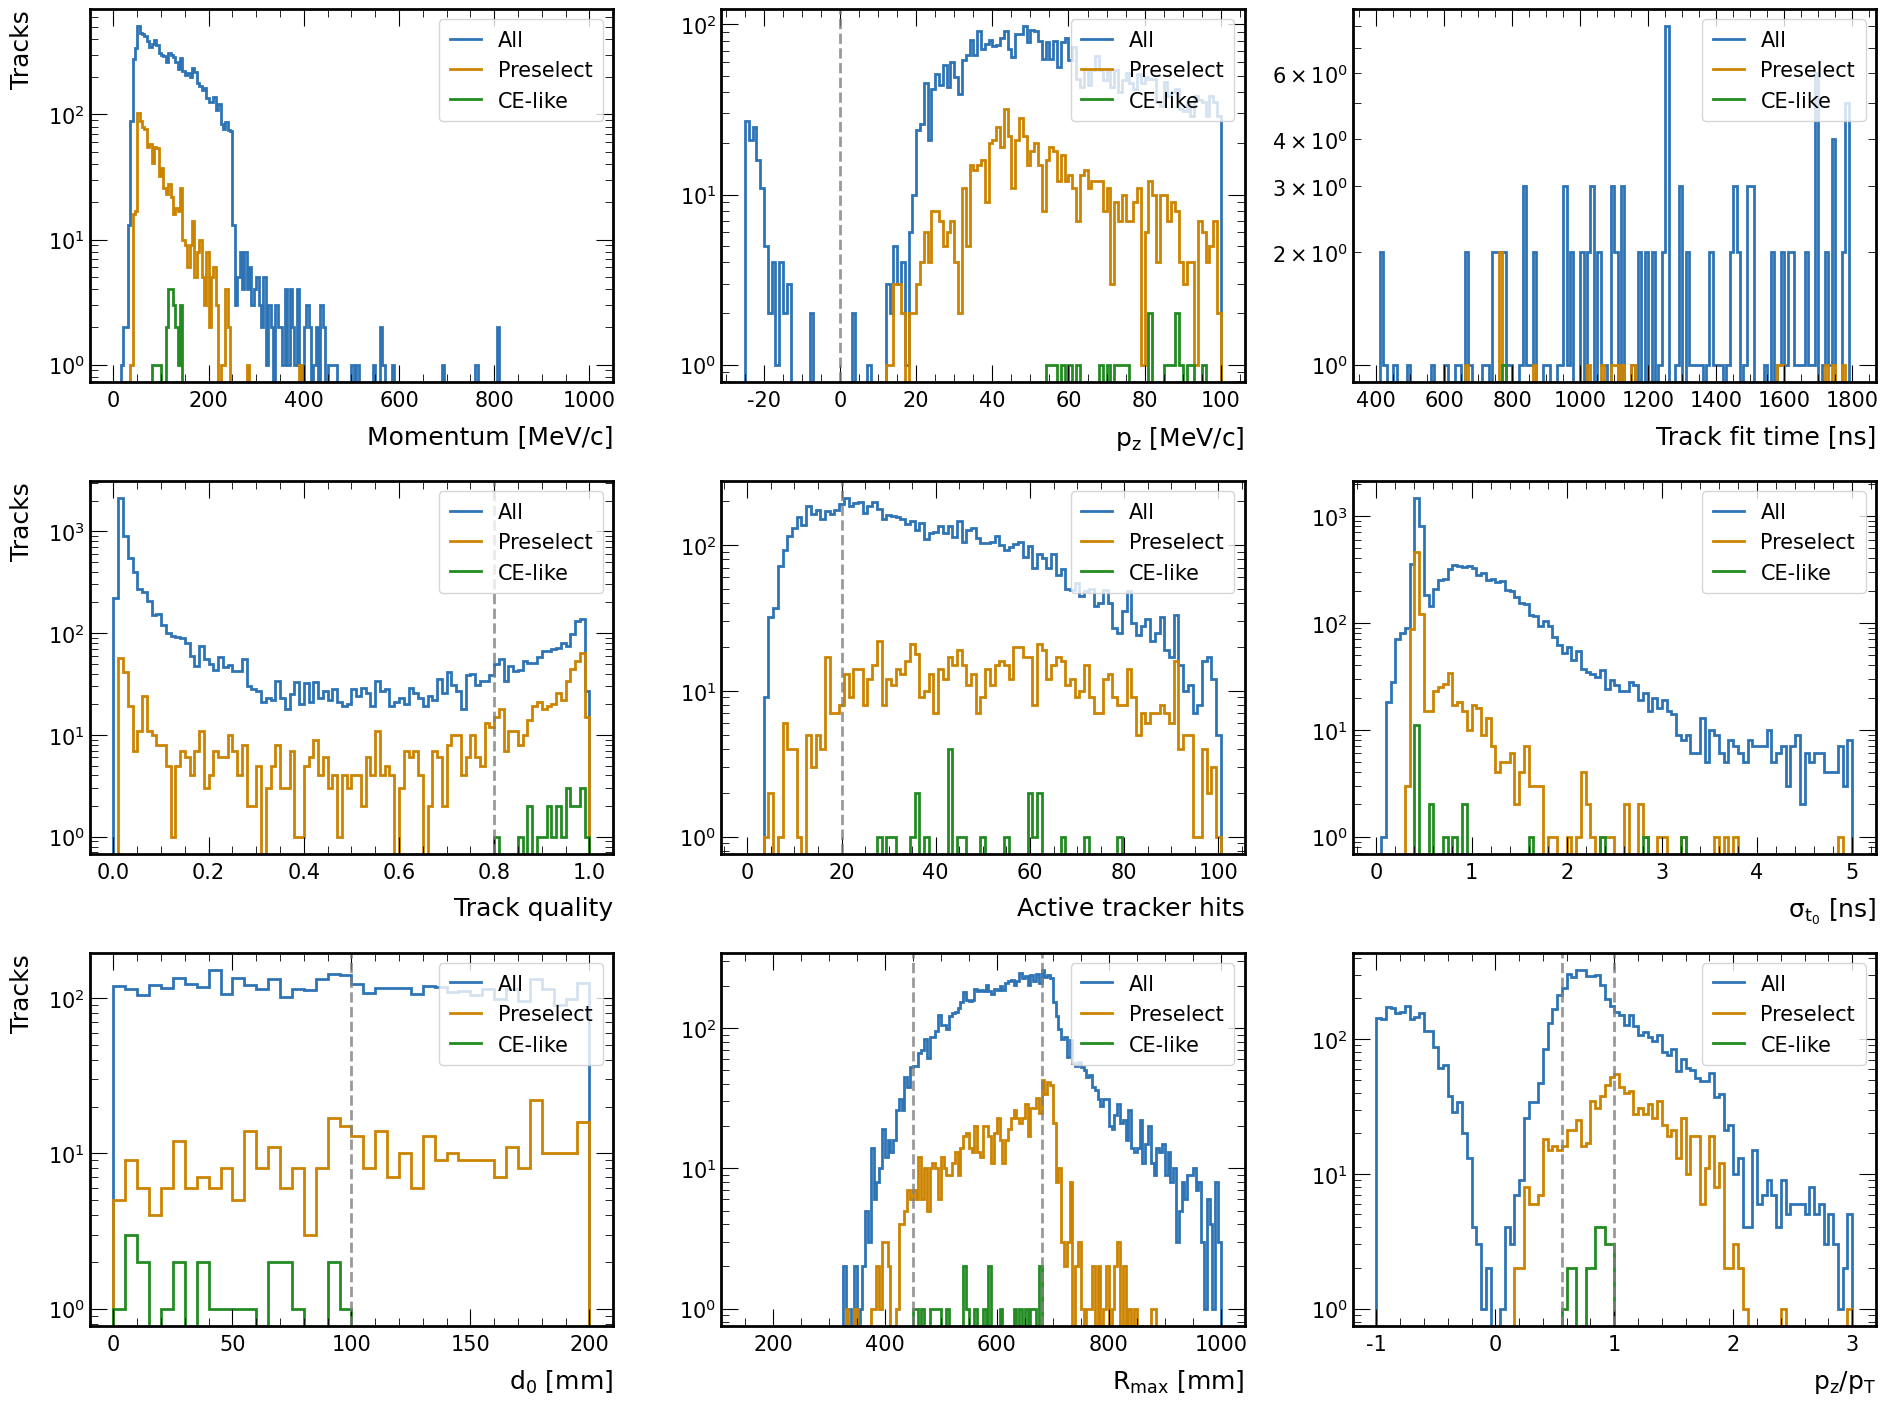

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/alpha_test/h1o_crv_.png


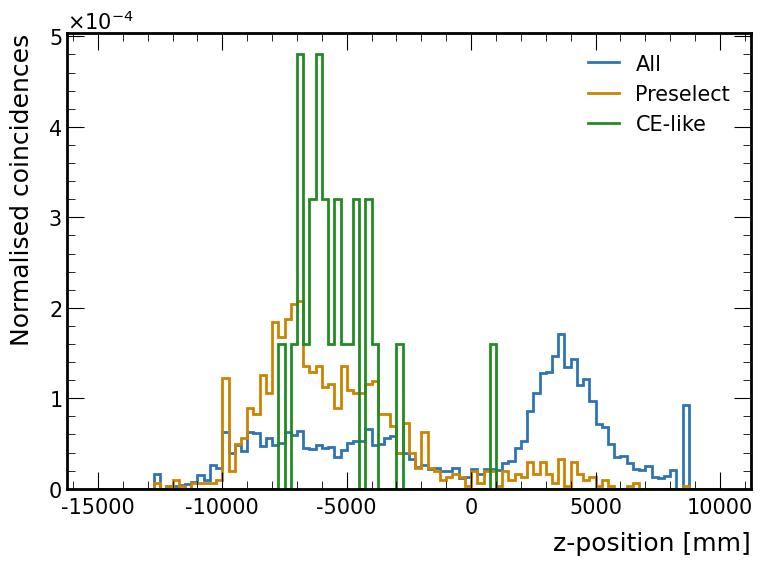

In [11]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_.png") 

### Background event info

In [12]:
print(results["event_info"])

In [13]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 0 event(s)...

